In [ ]:
pip install tensorflow

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
#load the MNIST dataset
(train_images , train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
#preprocessing normalize the pixel values to between 0 to 1
train_images = train_images /255.0
test_images = test_images /255.0

In [4]:
#Reshape the image to (28,28,1) as they are grayscale
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images= test_images.reshape((test_images.shape[0],28,28,1))


In [5]:
#convert labels into one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
#build the CNN model
model = models.Sequential()

#First Convolutional Layer
model.add(layers.Conv2D(32,(3,3),activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

#Second Convolutional Layer
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

#Third Convolutional Layer
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

#Flatten the 3D output to 1D and add a Danse layer
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))

#Output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation= 'softmax'))

#compile model
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])


C:\Users\tusha\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9449 - loss: 0.1807 - val_accuracy: 0.9832 - val_loss: 0.0491
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9844 - loss: 0.0479 - val_accuracy: 0.9851 - val_loss: 0.0459
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9880 - val_loss: 0.0372
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9921 - loss: 0.0264 - val_accuracy: 0.9892 - val_loss: 0.0306
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9889 - val_loss: 0.0342


In [10]:
#Evaluate the model on test data
test_loss, test_acc =model.evaluate(test_images,test_labels)
print(f"Test accuracy: {test_acc *100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0342
Test accuracy: 98.89%


In [12]:
#make prediction on test images
predictions = model.predict(test_images)
print(f"prediction for first test image : {np.argmax(predictions[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
prediction for first test image : 7


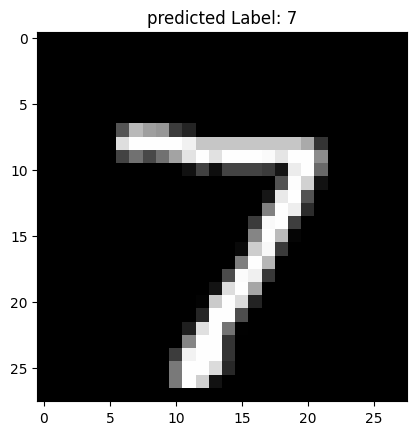

In [14]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')
plt.title (f"predicted Label: {predictions[0].argmax()}")
plt.show()